# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
!pip install tomotopy
!pip install little_mallet_wrapper

In [2]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [3]:
# Q2 (code)
directory = "/"
files = glob.glob(f"{directory}/*.csv")

sanders = pd.read_csv('sanders_tweets.csv')
trump = pd.read_csv('trump_tweets.csv')

df = pd.concat([sanders, trump], ignore_index=True) # Concatenate the datasets

df.head()

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [4]:
# Q3 (code)

import re

training_data = [
    re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '',
           little_mallet_wrapper.process_string(text, numbers='remove'), flags=re.MULTILINE)
    for text in df['Content']
] # Lowers the text and removes stopwords, punctuation, and numbers via little_mallet_wrapper.process_string()
# added "processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)"
# to remove URLS and mentions

original_texts = [text for text in df['Content']] # Add 'Content' to original_texts
titles = [title for title in df['Title']] # Add 'Title' to titles

little_mallet_wrapper.print_dataset_stats(training_data) # Get training data summary statistics

## Code adapted from [https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/10-Topic-Modeling-CSV.html#process-reddit-posts]

Number of Documents: 30371
Mean Number of Words per Document: 15.4
Vocabulary Size: 41673


## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [5]:
# Q4 (code)

# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

## Code taken from "Topic_Modeling_tomotopy.ipynb" from Week 6

Topic Model Training...


Iteration: 0	Log-likelihood: -9.702111001816592
Iteration: 10	Log-likelihood: -9.305328547344223
Iteration: 20	Log-likelihood: -9.13983488884682
Iteration: 30	Log-likelihood: -9.053091700006629
Iteration: 40	Log-likelihood: -8.992322043728498
Iteration: 50	Log-likelihood: -8.95351227261742
Iteration: 60	Log-likelihood: -8.920802917847661
Iteration: 70	Log-likelihood: -8.898652215690955
Iteration: 80	Log-likelihood: -8.880504374374432
Iteration: 90	Log-likelihood: -8.865739293243905


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [6]:
# Q5a (code)

# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

## Code taken from "Topic_Modeling_tomotopy.ipynb" from Week 6


Topic Model Results:


✨Topic 0✨

tax workers billion pay wage million class working year americans

✨Topic 1✨

great thank new house white america maga make see book

✨Topic 2✨

whitehouse great today thank honor president united states coronavirus law

✨Topic 3✨

great china jobs economy trade ever new big years record

✨Topic 4✨

news fake media never witch hunt russia schiff collusion report

✨Topic 5✨

biden left joe democrats media radical people pelosi want democrat

✨Topic 6✨

must people change drug end world climate states country united

✨Topic 7✨

president american trump america people country women stand today americans

✨Topic 8✨

vote senate democrats election house court states united impeachment republicans

✨Topic 9✨

trump president iran war new years office military made defense

✨Topic 10✨

border would people many country president democrats want wall good

✨Topic 11✨

trump president fbi obama campaign jim jordan investigation general evidence

✨Topic 12✨

heal

_# Q5b (words)_

_# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?_

Because the topics can get shifted around a little when re-running the code, I have added what a keywords show up per topic as I was answering this question.

* **Topic 0** (_trump court supreme president foxnews watch via judge tonight kavanaugh_): This likely refers to "trump"'s nomination of nominated Brett "kavanaugh" to the "supreme" "court". Kavanaugh was previously a U.S. circuit "judge".
* **Topic 1** (_great vote total endorsement strong complete military amendment state job_): These words seem mostly positive, based on "great", "endorsement", "strong", and "complete". This topic seems to be praising the US/state military.
* **Topic 2** (_president thank american trump today whitehouse coronavirus america covid new_): This refers to the "covid" / "coronavirus" outbreak which happened in "america" during "president" "trump"'s term. 
* **Topic 3** (_tax workers people must working billion pay change americans million_): Sanders is infamous for wanting to "tax" "million"aires/"billion"aires more, so blue collar "workers" / the average "working" "american" would benefit.
* **Topic 4** (_great thank today white house president honor whitehouse day united_): This seems to be a rather broad topic referring to praising either the "president" and/or the "white" "house" / "whitehouse" of the "united" States of America.
* **Topic 5** (_trump fbi president schiff mueller campaign russia call report comey_): This refers to the _Robert "mueller" special counsel investigation_, which was an "fbi" investigatio into the idea that "president" "trump"'s presidential "campaign" had either been sponsored by or supported by "russia". Adam "schiff" was one of the first persons to accuse Trump of this.
* **Topic 6** (_biden joe president trump democrats would never nothing left years_): This refers to "joe" "biden" taking over as "president" after "trump"'s term was up. Biden is a "democrat". 
* **Topic 7** (_jobs china years trade economy great ever year big country_): Both Trump and Sanders wanted more "jobs" in the "country" to boost the American "economy". Trump also wanted a "trade" deal with China.
* **Topic 8** (_thank trump great big night maga last win republican see_): This likely has to do with the 2016 election results, as the words seem to indicate a "great" "republican" "win", and it being a "big" "night" for the "trump" / "maga" ('Make America Great Again') campaign.
* **Topic 9** (_health care people must right americans country medicare security social_): Sanders especially advocated that "people" / "americans" should have the right to affordable "health" "care", wuch as "medicare". 
* **Topic 10** (_border wall great security north country korea immigration many good_): This topic seems to relate to foreign policy, specifically "immigration". Notably, Trump very much wanted to close the "border"s, while Sanders did not. Trump is also infamous for wanting to build a "wall" on the border between the USA and Mexico. Moreover, it has been alleged that Trump had ties to "north" "korea". 
* **Topic 11** (_news fake media people great new cnn never even many_): This topic is likely about the concept of "fake" "media" / "fake" "news" during the election, in which Trump called for "people" to stop believing said media. Trump specifically disliked "cnn", and promised to make America "great" again.
* **Topic 12** (_democrats senate vote house republicans impeachment people republican pelosi get_): This refers to Trump's "impeachment" by the United States congress. The "house" "democrats" "vote"d to impeach Trump, under Nancy "pelosi" -- twice. However, the "senate" acquitted Trump both times.
* **Topic 13** (_people must law country police nation american stand justice americans_): A current trend in America is the call for equal "justice", as the "country"'s "law"s are considered to be unjust and biassed towards a large group of "americans". Most notably, the "police" force is considered to be racist, incompetent, and power hungry -- unrepresentative of the "nation".
* **Topic 14** (_war president trump united states iran live world whitehouse must_): This most likely refers to the "war" in "iran" which the "united" "states" involved themselves in under "president" "trump" in the "whitehouse".

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [7]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5746677110095819 
Per Topic: [0.7130003243684768, 0.4913197785615921, 0.5475596696138382, 0.5436531662940979, 0.7443760573863983, 0.5752953603863716, 0.602797144651413, 0.44808596521615984, 0.512600165605545, 0.4267448917031288, 0.4373957194387913, 0.6530345410108567, 0.6627127140760422, 0.5320146411657334, 0.7294255256652832]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

_# Q6 (words)_

Topic coherence is "a measure that quantifies the semantic similarity between high scoring words in each topic" (Week 6 Slides). In this instance, `0` means there is no coherence, while `1` means there is maximum coherence.

At first, I used **15** topics to train the model on (see: _Q5b_), which led to the following coherence scores:

* Average: `0.5632082928717137`
* Per Topic: `[0.5458732128143311, 0.7524268865585327, 0.4849416330456734, 0.6362292140722274, 0.5286169499158859, 0.6557234644889831, 0.5389063686132431, 0.5345719367265701, 0.4716217666864395, 0.6242271333932876, 0.5291290327906608, 0.5329573504626751, 0.5582489460706711, 0.5039236009120941, 0.5507268965244293]`

These coherence scores are average across the board, with a `0.56` average.

With **7** topics, the coherence scores are as such:

* Average: `0.5050233439675399` 
* Per Topic: `[0.6074946105480195, 0.41739652007818223, 0.5534183442592621, 0.5261138953268528, 0.4303628757596016, 0.46238944977521895, 0.5379877120256424]`

Similar to the coherence scores of the 15 topics, these seem to be rather average as well, with a `0.51` average.

Seeing as less topics also led to a lower overall score, I re-ran the code again with **20** topics as well. These coherence scores were as follows:

* Average: `0.6019040995649994`
* Per Topic: `[0.5379222705960274, 0.6452826857566833, 0.7054191589355469, 0.5911167889833451, 0.5444848254323006, 0.6111246004700661, 0.5678991347551345, 0.5200339704751968, 0.5672390341758728, 0.5575328394770622, 0.49784696102142334, 0.7895608007907867, 0.5890060167759656, 0.574989914894104, 0.5100615963339805, 0.5470394521951676, 0.5870368123054505, 0.7751894354820251, 0.655393123626709, 0.6639025688171387]`

As suspected, a higher number of topics also increases the coherence scores, this time with a `0.6` average. To prove this in a rather aggregious way, I also ran the code with **50** topics, leading to these coherence scores:

* Average: `0.6311494893133641`
* Per Topic: `[0.6836634904146195, 0.8209899723529815, 0.6923168256878853, 0.7311984956264496, 0.5584407389163971, 0.6177050292491912, 0.5930688142776489, 0.6683756291866303, 0.7092124283313751, 0.5776619702577591, 0.6318268001079559, 0.5643571749329567, 0.5979069232940674, 0.5825867474079132, 0.5703236669301986, 0.6193717330694198, 0.7092808006331325, 0.7299154698848724, 0.7189078152179718, 0.5304928898811341, 0.5567850947380066, 0.6814566493034363, 0.594406220316887, 0.6663949221372605, 0.5368732929229736, 0.6486244201660156, 0.5669801160693169, 0.624530678987503, 0.6239861393347382, 0.6417555302381516, 0.7629347383975983, 0.6618366226553917, 0.6887161530554294, 0.7351990342140198, 0.5312954694032669, 0.5753773808479309, 0.6305660545825958, 0.648004800081253, 0.5762645572423934, 0.6035854101181031, 0.6007377147674561, 0.6145432263612747, 0.5176980793476105, 0.7588082164525985, 0.568218144774437, 0.5892994463443756, 0.6328431844711304, 0.5624637380242348, 0.7445100963115692, 0.505175918340683]`

This once again shows an increase, with a `0.63` average. However, the increase is much smaller than the jump from 7 to 20 topics, or even 15 to 20 topics. This means that there is a curve in relation to the coherence scores. I also assume that the inclusion of more topics is related to the medium of the corpus, as the corpus consists of over 3000 messages short messages.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [8]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [9]:
# Q7a (code)

topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
# This list corresponds to the likelihood that each of the 15 topics exists in a tweet

topic_distributions[0]
# '0' taken from [https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/10-Topic-Modeling-CSV.html#load-topic-distributions]

## Code taken from "Topic_Modeling_tomotopy.ipynb" from Week 6

[0.9447523,
 0.0034524468,
 0.0038705324,
 0.004998722,
 0.0045648743,
 0.0042470964,
 0.0047891866,
 0.0037476036,
 0.0041114925,
 0.0030636764,
 0.0061196233,
 0.0028266064,
 0.004058785,
 0.0025941376,
 0.0028029156]

In [10]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

## Code taken from "Topic_Modeling_tomotopy.ipynb" from Week 6

In [11]:
get_top_docs(titles, topic_distributions, topic_index=2, n=7) # Display 7 documents for topic 2
get_top_docs(titles, topic_distributions, topic_index=4, n=7) # Display 7 documents for topic 4
get_top_docs(titles, topic_distributions, topic_index=7, n=7) # Display 7 documents for topic 7
get_top_docs(titles, topic_distributions, topic_index=10, n=7) # Display 7 documents for topic 10
get_top_docs(titles, topic_distributions, topic_index=14, n=7) # Display 7 documents for topic 14

### ✨Topic 2✨

whitehouse great today thank honor president united states coronavirus law



---


✨  
**Topic Probability**: 0.9077052474021912  
**Document**: @realDonaldTrump_1168493189050896384



✨  
**Topic Probability**: 0.906898021697998  
**Document**: @realDonaldTrump_942827072824672262



✨  
**Topic Probability**: 0.906898021697998  
**Document**: @realDonaldTrump_1208248471200899072



✨  
**Topic Probability**: 0.906898021697998  
**Document**: @realDonaldTrump_1068744039372152833



✨  
**Topic Probability**: 0.906898021697998  
**Document**: @realDonaldTrump_1051814214212485120



✨  
**Topic Probability**: 0.9016913175582886  
**Document**: @realDonaldTrump_967083810981597185



✨  
**Topic Probability**: 0.9016913175582886  
**Document**: @realDonaldTrump_1032259660378779648



### ✨Topic 4✨

news fake media never witch hunt russia schiff collusion report



---


✨  
**Topic Probability**: 0.9419118762016296  
**Document**: @realDonaldTrump_1088639701064404992



✨  
**Topic Probability**: 0.9354290962219238  
**Document**: @realDonaldTrump_944329684032081921



✨  
**Topic Probability**: 0.9354290962219238  
**Document**: @realDonaldTrump_1162000838765830146



✨  
**Topic Probability**: 0.9329342246055603  
**Document**: @realDonaldTrump_1259181026972258305



✨  
**Topic Probability**: 0.9329342246055603  
**Document**: @realDonaldTrump_1008357782410711041



✨  
**Topic Probability**: 0.9273176193237305  
**Document**: @realDonaldTrump_1248591409743003650



✨  
**Topic Probability**: 0.9273176193237305  
**Document**: @realDonaldTrump_1137697506454835200



### ✨Topic 7✨

president american trump america people country women stand today americans



---


✨  
**Topic Probability**: 0.9066904187202454  
**Document**: @realDonaldTrump_1194279077546483714



✨  
**Topic Probability**: 0.8730806112289429  
**Document**: @realDonaldTrump_1271163756144279552



✨  
**Topic Probability**: 0.8632276058197021  
**Document**: @realDonaldTrump_1271204414456553482



✨  
**Topic Probability**: 0.8610851764678955  
**Document**: @realDonaldTrump_1279464546097418240



✨  
**Topic Probability**: 0.8537279367446899  
**Document**: @realDonaldTrump_1002027245131661312



✨  
**Topic Probability**: 0.8517160415649414  
**Document**: @realDonaldTrump_868047480847568896



✨  
**Topic Probability**: 0.8517160415649414  
**Document**: @realDonaldTrump_1025435905736228864



### ✨Topic 10✨

border would people many country president democrats want wall good



---


✨  
**Topic Probability**: 0.8962113857269287  
**Document**: @realDonaldTrump_1090967053689937921



✨  
**Topic Probability**: 0.8826035261154175  
**Document**: @realDonaldTrump_1256679173264998401



✨  
**Topic Probability**: 0.8826035261154175  
**Document**: @realDonaldTrump_1256592077355397121



✨  
**Topic Probability**: 0.8785284757614136  
**Document**: SenSanders_898212841576058880



✨  
**Topic Probability**: 0.872367799282074  
**Document**: @realDonaldTrump_1266434153932894208



✨  
**Topic Probability**: 0.869098424911499  
**Document**: @realDonaldTrump_1176819645699043328



✨  
**Topic Probability**: 0.8677901029586792  
**Document**: @realDonaldTrump_1187838848732020737



### ✨Topic 14✨

great state vote endorsement total strong military big complete amendment



---


✨  
**Topic Probability**: 0.9379556179046631  
**Document**: @realDonaldTrump_1234455653529325568



✨  
**Topic Probability**: 0.9379556179046631  
**Document**: @realDonaldTrump_1026474458326986752



✨  
**Topic Probability**: 0.9379556179046631  
**Document**: @realDonaldTrump_1009770941604298753



✨  
**Topic Probability**: 0.9357302784919739  
**Document**: @realDonaldTrump_1227986935240691712



✨  
**Topic Probability**: 0.9357302784919739  
**Document**: @realDonaldTrump_1170469619154530305



✨  
**Topic Probability**: 0.9357302784919739  
**Document**: @realDonaldTrump_1019545713435467776



✨  
**Topic Probability**: 0.9333394169807434  
**Document**: @realDonaldTrump_1314673151406682117



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

_# Q7b (words)_

Because the topics can get shifted around a little when re-running the code, I have added what a keywords show up per topic as I was answering this question. (The topics are the same as _Q5b_.) It should be noted that because I wanted to keep the topics the same as Q5b, and had messed around with the coherence scores prior to this, I was unable to re-run this code without getting different topic orders and/or slightly different topic words. As such, Trump is overrepresented in these results.

* **Topic 2** (_president thank american trump today whitehouse coronavirus america covid new_): The covid-related topic is primarily related to Trump (none of Sanders' tweets have made it into the top 5). This likely stems from Trump having been president during the covid period and thus needing to speak on it. In contrast, Sanders was not the leader of the United States of America and likely had much less to say about it -- this is not saying he did not speak about it at all. 
* **Topic 4** (_great thank today white house president honor whitehouse day united_): Topic 4 is also populated by Trump's tweets, which enforced the idea that the topic relates to his precidency. 
* **Topic 7** (_jobs china years trade economy great ever year big country_): I must admit I'm a little surprised that Sanders did not show up in these tweets at all, as I figured he would show up in the top results based on his commentary on the current US job market and the economy. Instead, it seems the top posts are related to Trump's policy of wanting to create more jobs in the United States and his trade deal with China.
* **Topic 10** (_border wall great security north country korea immigration many good_): As expected, Trump is overrepresented in these results due to his aggressive border policies, including wanting to build a wall on the border between the USA and Mexico. Moreover, Trump is much more often associated with North Korea than Sanders would ever be.
* **Topic 14** (_war president trump united states iran live world whitehouse must_): Out of all the topics, this one is the one where Sanders is the primary representative -- something which also surprises me. It seems that Trump himself was less interested about tweeting about the war in Iran than Sanders was in critiquing Trump for the way the White House and the United States involved themselves in the war.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [12]:
# Create a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [13]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

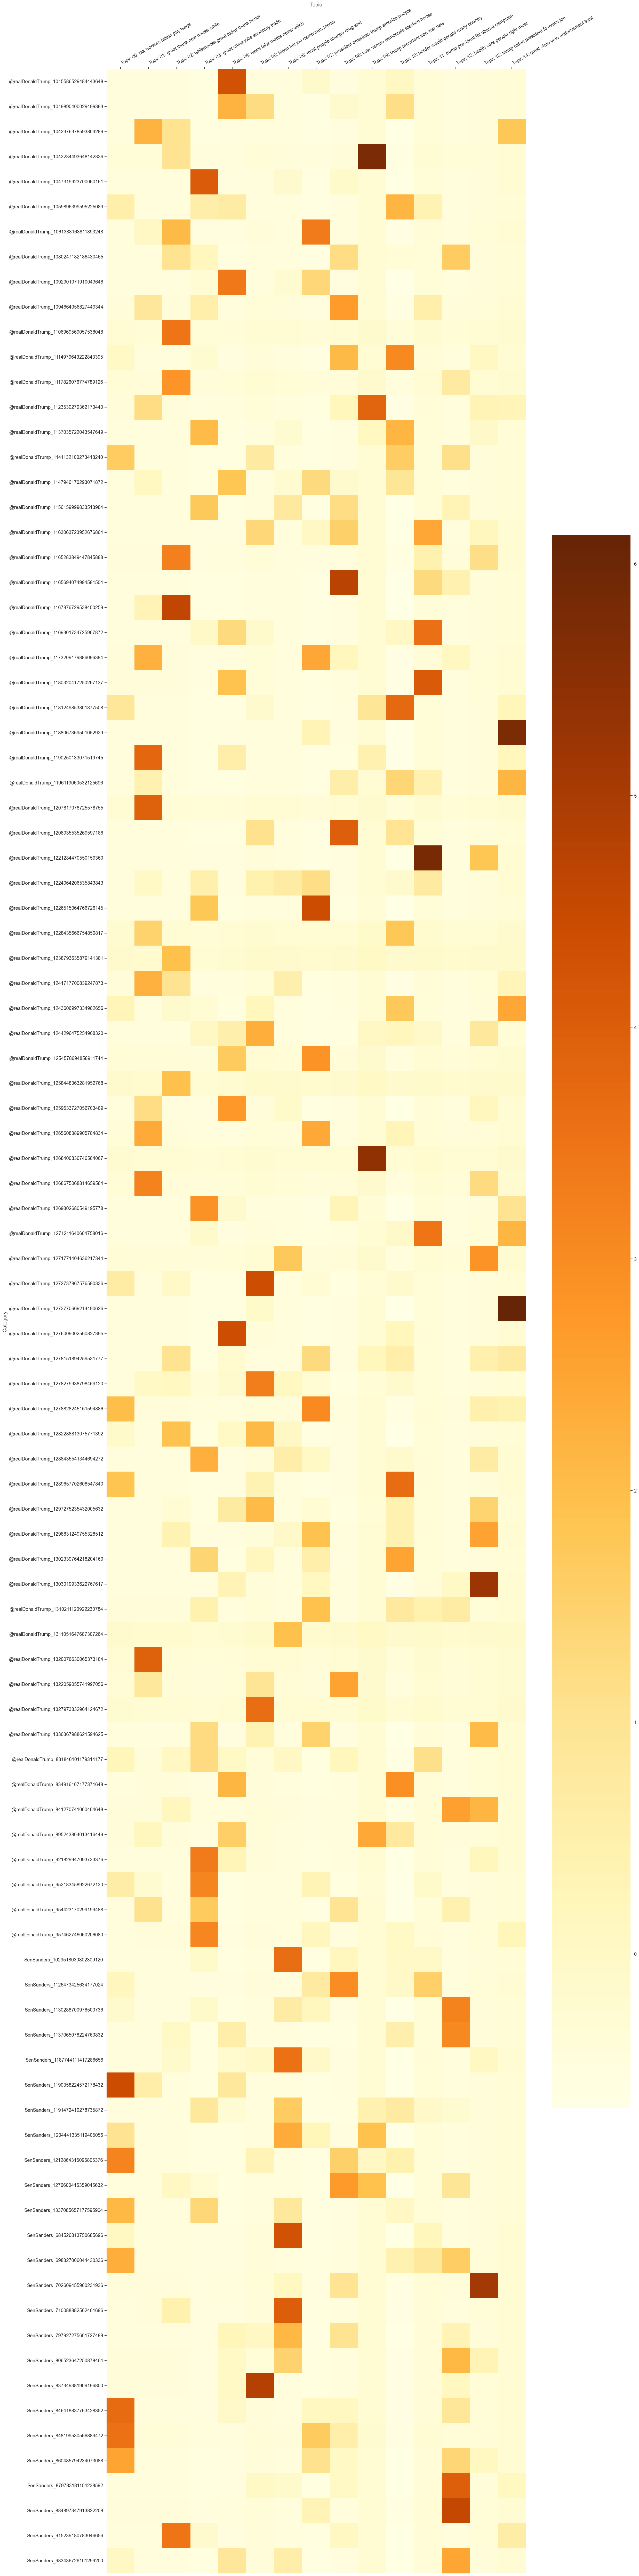

In [14]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'YlOrBr', # funky colours taken from [https://matplotlib.org/stable/users/explain/colors/colormaps.html]
                                 dim=(25,100))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

_# Q9 (words)_

Because the topics can get shifted around a little when re-running the code, I have added what a keywords show up per topic as I was answering this question. (The topics are the same as _Q5b_.) It should be noted that because I wanted to keep the topics the same as Q5b, and had messed around with the coherence scores prior to this, I was unable to re-run this code without getting different topic orders and/or slightly different topic words.

Based on the randomly selected samples, Trump seems more inclined to talk about topics 0, 1, 2, 4-8, and 13; while Sanders' tweets allign themselves more with topics 3, 9, 12-14. Although it should be noted that topics 12-14 are not particularly exclusive to Sanders. It doesn't surprise me, however, that topic 9 (related to health care) is mostly associated with Sanders, as this was something he was very passionate about.

However, it should be noted that most of the tweets in the heat map do originate from Trump, which is likely not the fault of the random sampling but reflective of Trump's infamous tweeting habits. As such, it seems to me that Sanders is somewhat underrepresented in the heatmap, if not the topics in general.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [15]:
# X2 (code)
import pandas as pd
import random

sanders_tweets = df[df['Username'] == 'SenSanders'] # Selects tweets by Sanders
trump_tweets = df[df['Username'] == '@realDonaldTrump'] # Selects tweets by Trump

sanders_sample = sanders_tweets.sample(n=min(50, len(sanders_tweets)), random_state=1) # Selects 50 random Sanders tweets using Pandas random
trump_sample = trump_tweets.sample(n=min(50, len(trump_tweets)), random_state=1) # Selects 50 random Trump tweets using Pandas random
    
balanced_sample = pd.concat([sanders_sample, trump_sample])

balanced_sample

,Username,TweetId,Title,Content
231,SenSanders,1297987310320078848,SenSanders_1297987310320078848,The fact that Wall Street executives made an o...
5009,SenSanders,815379521490812928,SenSanders_815379521490812928,The poverty we have today is big enough a prob...
5432,SenSanders,786948481395089408,SenSanders_786948481395089408,I wish I could say that we as a country have m...
5448,SenSanders,785865904869572608,SenSanders_785865904869572608,Students who study hard get hit with insurmoun...
5878,SenSanders,758780595065323520,SenSanders_758780595065323520,"Social change, real change, does not happen in..."
...,...,...,...,...
21743,@realDonaldTrump,1228814145262247936,@realDonaldTrump_1228814145262247936,RT @SenateGOP: Chairman @SenJohnBarrasso: 60...
22622,@realDonaldTrump,1241718109284728832,@realDonaldTrump_1241718109284728832,RT @senatemajldr: More Americans are being la...
21243,@realDonaldTrump,1222496705763008515,@realDonaldTrump_1222496705763008515,For a guy who couldn‚Äôt get approved for the...
17603,@realDonaldTrump,1173231877181857795,@realDonaldTrump_1173231877181857795,Brett Kavanaugh should start suing people for...


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [16]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

training_data_titles = dict(zip(training_data, titles))
training_data_original_text = dict(zip(training_data, original_texts))

def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_titles[document] + "\n")
    return

## Code adapted from [https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/10-Topic-Modeling-CSV.html#display-top-titles-per-topic]

In [17]:
display_top_titles_per_topic(topic_number=0, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 0
display_top_titles_per_topic(topic_number=1, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 1
display_top_titles_per_topic(topic_number=2, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 2
display_top_titles_per_topic(topic_number=3, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 3
display_top_titles_per_topic(topic_number=4, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 4
display_top_titles_per_topic(topic_number=5, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 5
display_top_titles_per_topic(topic_number=6, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 6
display_top_titles_per_topic(topic_number=7, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 7
display_top_titles_per_topic(topic_number=8, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 8
display_top_titles_per_topic(topic_number=9, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 9
display_top_titles_per_topic(topic_number=10, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 10
display_top_titles_per_topic(topic_number=11, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 11
display_top_titles_per_topic(topic_number=12, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 12
display_top_titles_per_topic(topic_number=13, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 12
display_top_titles_per_topic(topic_number=14, number_of_documents=5) # Shows the top 5 tweets with the highest probability of containing Topic 14

✨Topic 0✨

tax workers billion pay wage million class working year americans

0.9448 SenSanders_1351670845639421952

0.9448 SenSanders_1075412067744657408

0.9411 SenSanders_1099354328580669440

0.9411 SenSanders_1047925715046416384

0.939 SenSanders_1085617301267931136

✨Topic 1✨

great thank new house white america maga make see book

0.9062 @realDonaldTrump_1194033162936102912

0.8885 @realDonaldTrump_1226563498479640576

0.881 @realDonaldTrump_1126183652042391553

0.8724 @realDonaldTrump_1194608581590564865

0.8724 @realDonaldTrump_1130526242531364864

✨Topic 2✨

whitehouse great today thank honor president united states coronavirus law

0.9077 @realDonaldTrump_1168493189050896384

0.9069 @realDonaldTrump_942827072824672262

0.9069 @realDonaldTrump_1051814214212485120

0.9069 @realDonaldTrump_1208248471200899072

0.9069 @realDonaldTrump_1068744039372152833

✨Topic 3✨

great china jobs economy trade ever new big years record

0.9476 @realDonaldTrump_1280517860725530624

0.9476 @real